**Exercise 2.4**: There are actually two kinds of ER graphs. The one we generated in the chapter,  𝐺(𝑛,𝑝) , is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted  𝐺(𝑛,𝑚) , is also characterized by two parameters: the number of nodes,  𝑛 , and the number of edges,  𝑚 . Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition. Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges,  `𝑚` , and returns a random selection of  `𝑚`  edges. A simple way to do that is to generate a list of all possible edges and use random.sample.



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns

# random seed
np.random.seed(11)

# set node colors
colors = sns.color_palette('pastel', 8)
sns.set_palette(colors)

C:\Users\Carlo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
def m_pairs(nodes, m):
    edges = []
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i != j:
                edges.append((u,v))
    rand_edges = [edges[i] for i in np.random.choice(len(edges), m)]
    return rand_edges

In `m_pairs`, I initialized a list `edges` for all the possible edges given the nodes. After storing all the possible edges, I picked a list of `m` indices randomly and used these indices to get the corresponding edges. Here is an example run of `m_pairs`.

In [5]:
np.random.seed(11)
m_pairs(range(10), 15)

[(2, 8),
 (7, 0),
 (8, 9),
 (9, 0),
 (6, 1),
 (1, 5),
 (8, 4),
 (3, 7),
 (7, 9),
 (9, 1),
 (2, 7),
 (5, 3),
 (3, 6),
 (5, 0),
 (0, 5)]

2. Write a function called make_`m_graph` that takes  𝑛  and  𝑚  and returns a random graph with  𝑛 nodes and  𝑚 edges.

C:\Users\Carlo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Carlo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


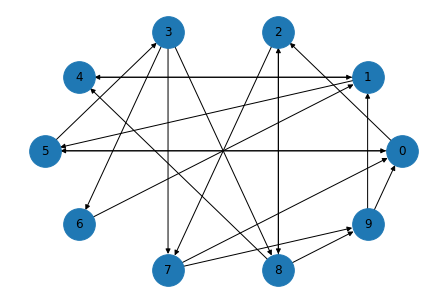

In [7]:
def make_m_graph(n, m):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes, m))
    return G

random_graph = make_m_graph(10, 20)
nx.draw_circular(random_graph,
                 node_colors = 'C0',
                 node_size = 1000,
                 with_labels = True)

Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.



In [8]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend([n for n in G.neighbors(node) if n not in seen])
    return seen

def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

def prob_connected(n, m, iters = 100):
    tf = [is_connected(make_m_graph(n, m)) for i in range(iters)]
    return np.mean(tf)



In [10]:
np.random.seed(11)
n = 10
m = 30
prob_connected(n, m, 1000)

0.611

3. Compute the probability of connectivity for a range of values of  𝑚 .



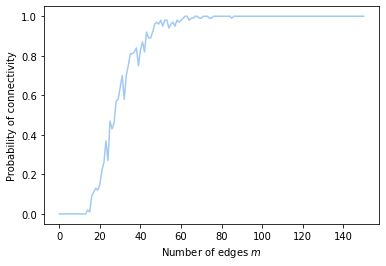

In [11]:
ms = np.arange(0, 151, 1)

ys = [prob_connected(n, m) for m in ms]

plt.plot(ms, ys, label = 'blue')
plt.xlabel(r'Number of edges $m$')
plt.ylabel('Probability of connectivity')
plt.show()

We can also compute for the probability of connectivity for different values of `n`.

20.723265836946414


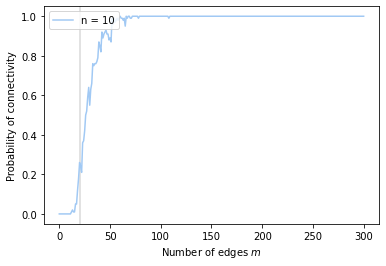

56.918913197525825


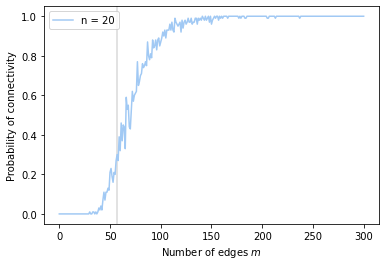

143.86629871044352


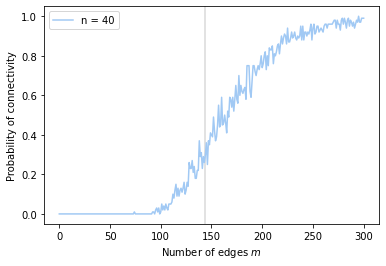

In [12]:
ns = [10, 20, 40]
ms = np.arange(0, 301, 1)

for n in ns:
    pstar = (n-1)*np.log(n)
    print(pstar)
    plt.axvline(pstar, color='gray', alpha=0.3)
    ys = [prob_connected(n, m) for m in ms]
    plt.plot(ms, ys, label = 'n = %d' %n)
    plt.xlabel(r'Number of edges $m$')
    plt.ylabel('Probability of connectivity')
    plt.legend(loc = 2)
    #plt.xscale('log')
    plt.show()

4. How do the results of this experiment compare to the results using the first type of ER graph?

The results for the second type of ER graph are actually opposite to the first type wherein as the number `n` of nodes increases, the transition from low probability of connectivity to high probability becomes less abrupt. Also, as `n` increases, the number of edges `m` where the transition occurs increases. This is because `m` is directly related to the probability of edges `p` in the first type of ER graph.

In the first type, `m` is determined by choosing `p` and multiplying by the total number of edges. In the second type, we determine `p` by choosing m and dividing by the total number of edges. Thus for a complete digraph with `n` nodes, `p` and `m` are related as

$$ p = \frac{m}{n(n-1)} $$

We know that the critical probability according to ER is 

$$ p_{c} = \frac{\ln{n}}{n} $$

If we equate $p_{c}$ to $m/n(n-1)$, we arrive at the corresponding critical value of the number of edges $m_{c}$

$$ m_c = (n-1)(\ln{n}) $$

These values are plotted along with those in the previous plots as the gray vertical lines. However, I expected that they would be located at the inflection point in the plots, but $m_c$ is somewhat less than the inflection point. It is also interesting to note that the probability reaches 1.0 at lower ratios of the total number of possible edges as the `n` increases, similar to the behavior of the critical probability in the first type of ER graph.